In this notebook:
- We will generate a synthetic data set with non-correlated input features
- Add some gaussian noise to the target feature
- Fit diferent regression models to this dataset and evaluate how they perform on the noisy data set. 

## Import necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,
                                mean_squared_error,
                                root_mean_squared_error,
                                max_error)

## Create a data set and add some noise to the target feature

In [2]:
# A synthetic data set with some Gaussian noise
df = pd.DataFrame()
n_samples = 2000
intercept = 0.15
noise_scale = 0.2

a1 = np.random.rand(n_samples)
a2 = np.random.rand(n_samples)
a3 = np.random.rand(n_samples)
a4 = np.random.rand(n_samples)
a5 = np.random.rand(n_samples)

target_without_noise = intercept + a1 + a2 + a5

noise = np.random.normal(0, noise_scale, len(a1))
target_with_noise = target_without_noise + noise

df["a1"] = a1
df["a2"] = a2
df["a3"] = a3
df["a4"] = a4
df["a5"] = a5
df["target_without_noise"] = target_without_noise
df["target_with_noise"] = target_with_noise

In [3]:
df.head()

,a1,a2,a3,a4,a5,target_without_noise,target_with_noise
0,0.821317,0.748041,0.860466,0.615311,0.003437,1.722795,2.197314
1,0.695372,0.608218,0.045308,0.726515,0.131864,1.585455,1.644220
2,0.796097,0.577663,0.334997,0.667922,0.430623,1.954384,1.944087
3,0.929626,0.247122,0.246502,0.074046,0.487582,1.814330,2.103006
4,0.689982,0.780523,0.064854,0.512267,0.546516,2.167020,2.364547


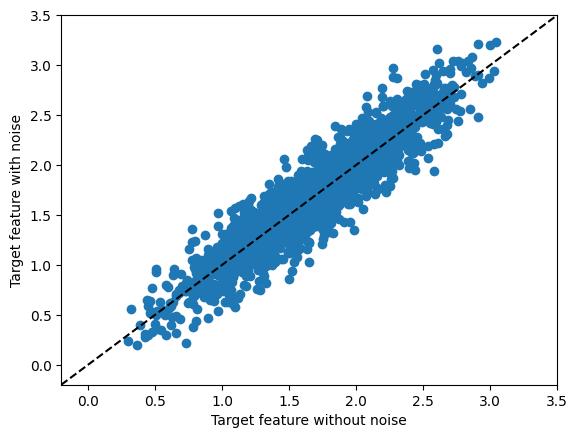

In [4]:
# Plot the target feature without and with noise 
plt.scatter(df.target_without_noise, df.target_with_noise)
plt.axline(xy1=(0,0), slope=1, c="black", linestyle="--")
plt.xlim(-0.2,3.5)
plt.ylim(-0.2,3.5)
plt.xlabel("Target feature without noise")
plt.ylabel("Target feature with noise")
plt.show();

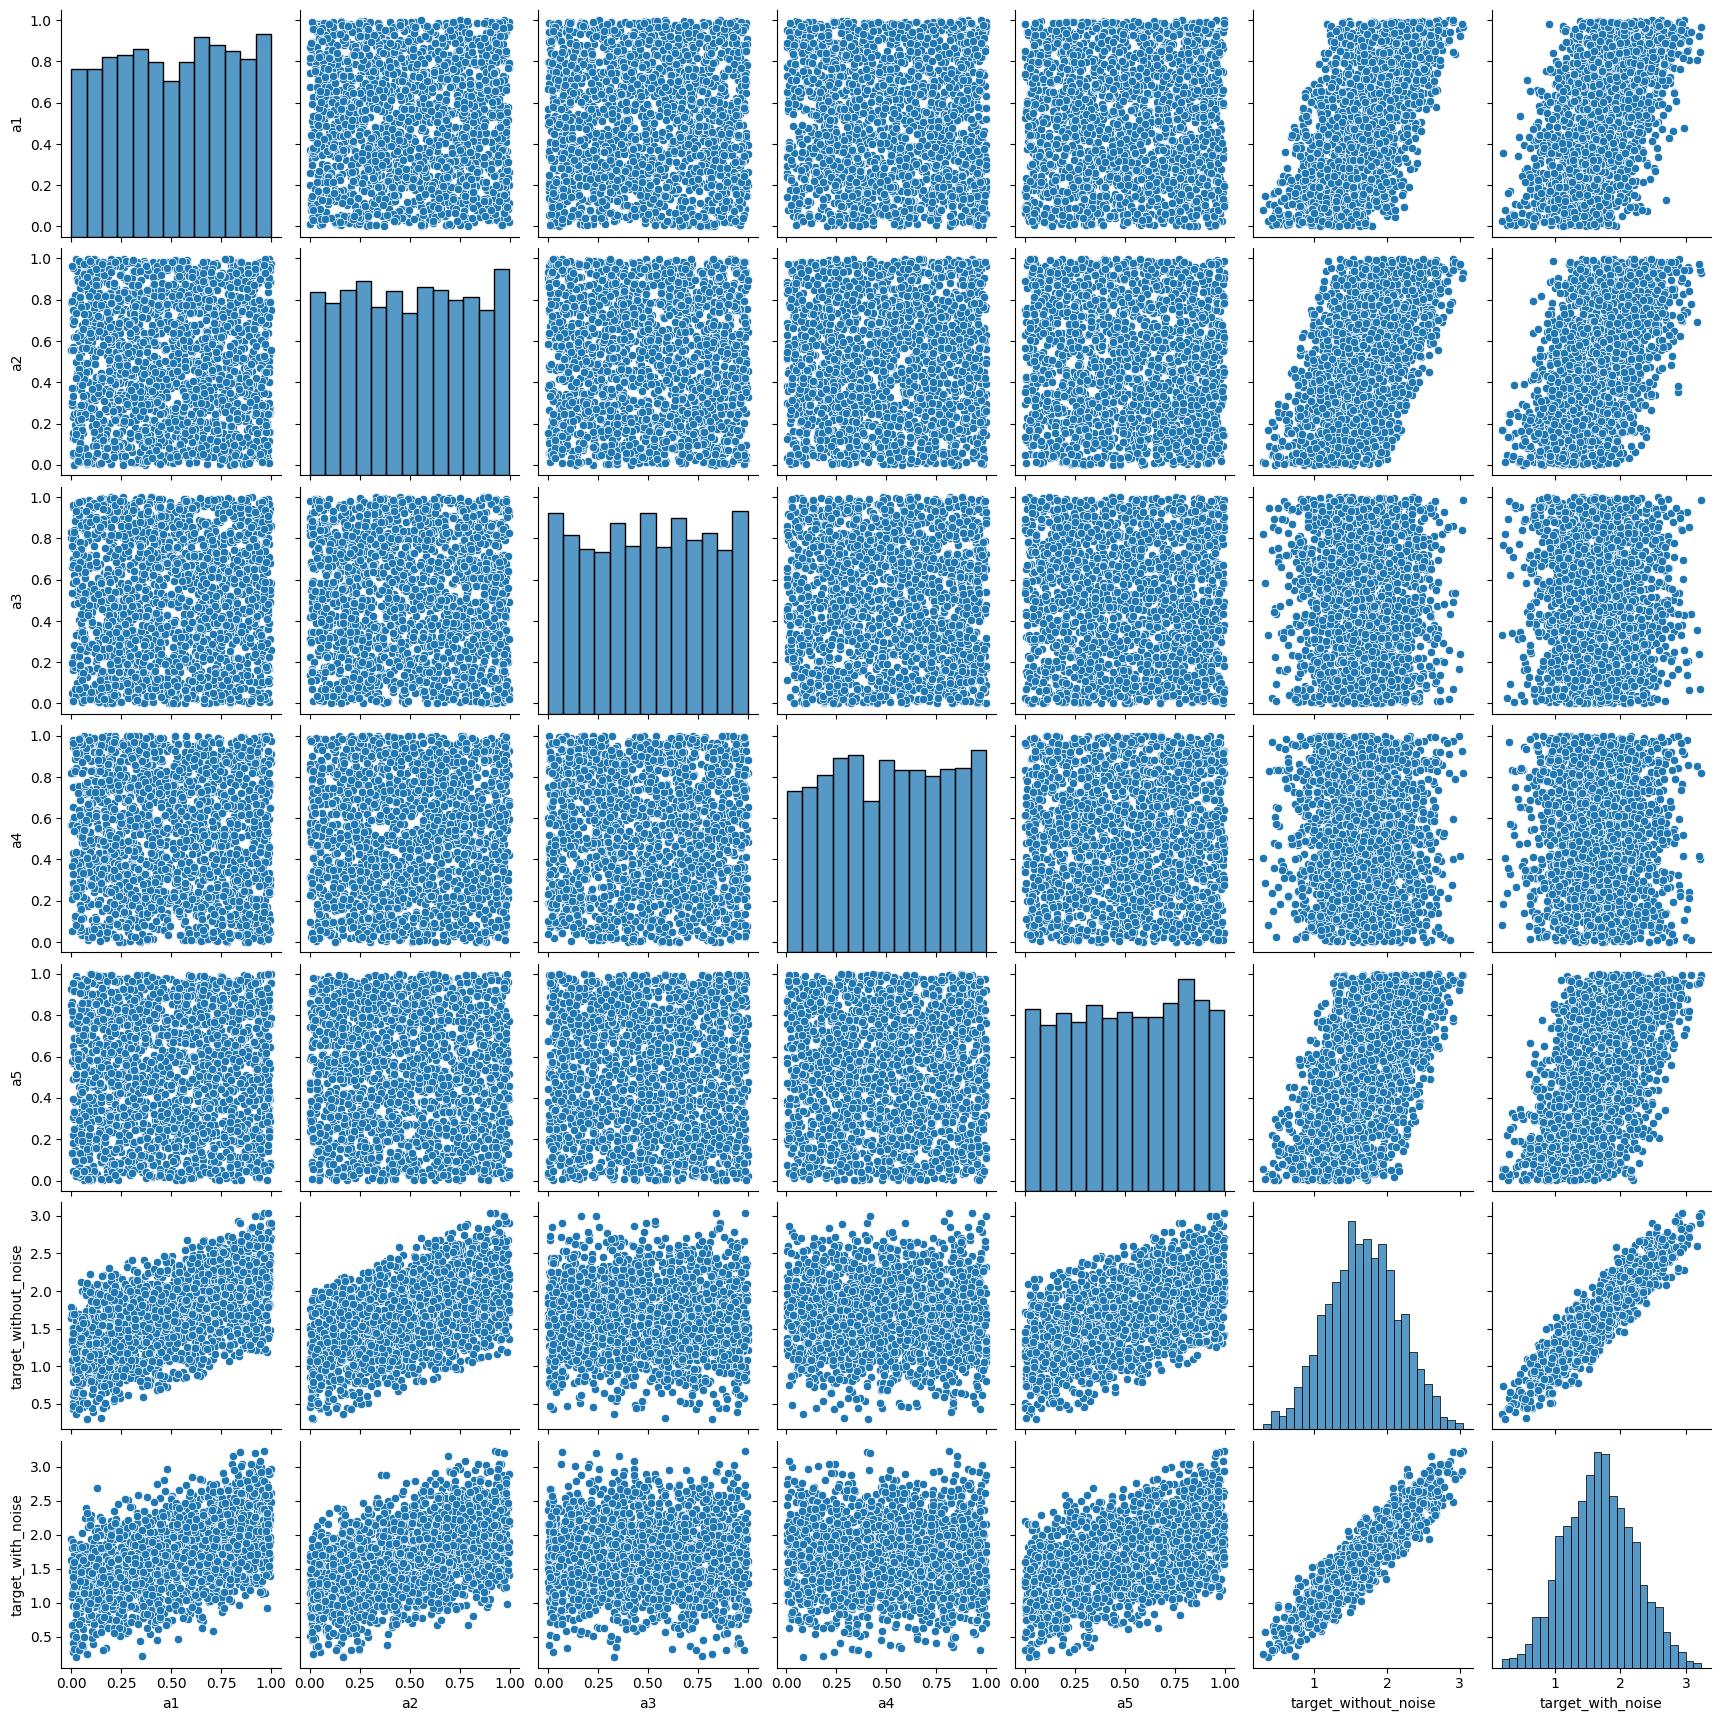

In [5]:
# Pair plot of the features
sns.pairplot(df)

## Fit a model using the data set we just created

#### First, we use target feature without noise to fit a `LinearRegression` model

In [6]:
# Split the data in to training and testing set
# Here, we are using the target feature without noise 
X_train_without_noise, X_test_without_noise, \
    y_train_without_noise, y_test_without_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-2]],
                                                    test_size=0.25)

In [7]:
## Fit a model
model = LinearRegression().fit(X_train_without_noise, y_train_without_noise)

In [8]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_without_noise)

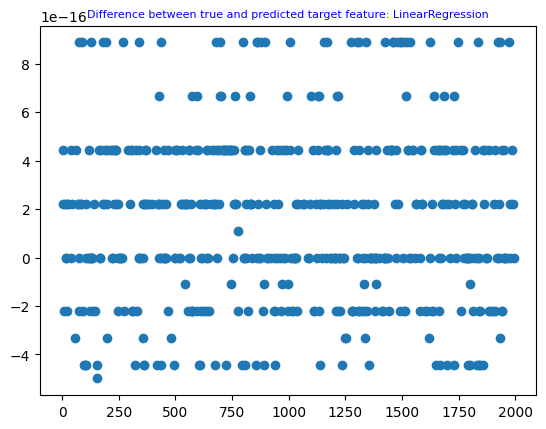

In [9]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_without_noise - y_pred, "o")
plt.title("Difference between true and predicted target feature: LinearRegression",
          c="blue", fontsize=8)
plt.show();

In [10]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_without_noise, y_test_without_noise))
print("Mean absolute error =", mean_absolute_error(y_test_without_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_without_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_without_noise, y_pred))
print("Maximum error =", max_error(y_test_without_noise, y_pred))

Coefficient of determination = 1.0
Mean absolute error = 2.9187763317395365e-16
Mean squared error = 1.461919494745908e-31
Root mean squared error = 3.823505583552753e-16
Maximum error = 8.881784197001252e-16


In [11]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.15000000000000058


In [12]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1. 1. 0. 0. 1.]


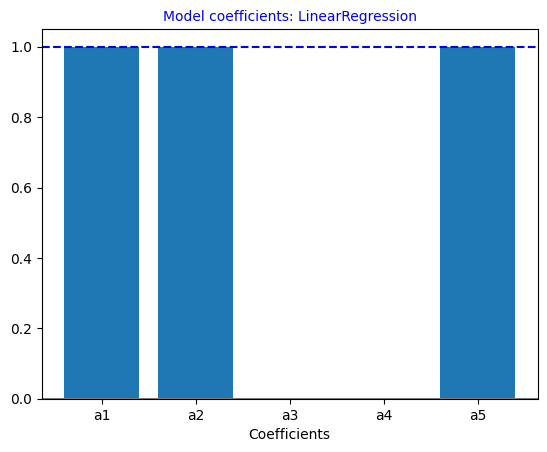

In [13]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LinearRegression", c="blue", fontsize=10)
plt.show();

#### Now, we use target feature with noise to fit a `LinearRegression` model

In [14]:
# Split the data in to training and testing set
# Here, we are using the target feature with noise 
X_train_with_noise, X_test_with_noise,\
    y_train_with_noise, y_test_with_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-1]],
                                                    test_size=0.25)

In [15]:
## Fit a model
model = LinearRegression().fit(X_train_with_noise, y_train_with_noise)

In [16]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

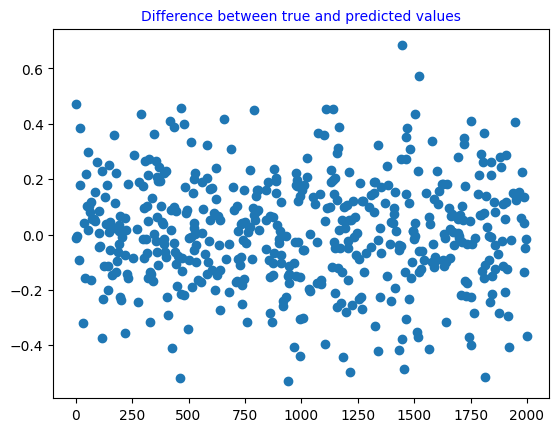

In [17]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [18]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.866218512159504
Mean absolute error = 0.15448110867969603
Mean squared error = 0.038397416987415604
Root mean squared error = 0.19595258862136933
Maximum error = 0.6829005271194761


In [19]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.17072894662557148


In [20]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 0.99163009  1.00594642 -0.01019328 -0.00991764  0.98973749]


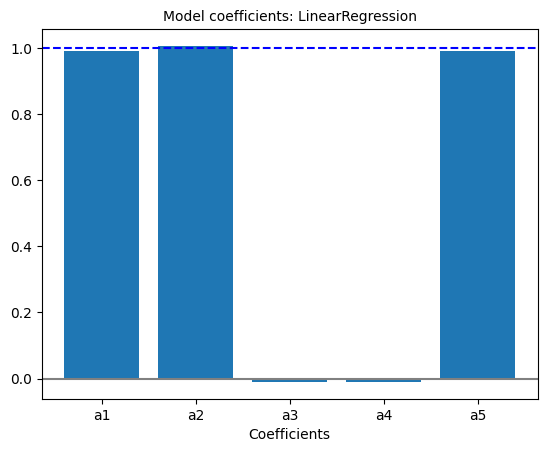

In [21]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LinearRegression", fontsize=10)
plt.show();

Important points to note:
- When we used `target feature without noise` to train and test our model, the `model performed extremely well` in predicting target feature and the coefficients associated with input features.
- When we used `target feature with noise` to train and test our model, the `model still performed resonably` in predicting the coefficients.

## Now, we will explore other regression methods using noisy target feature

#### Lasso

In [22]:
## Fit a model
model = Lasso(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [23]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

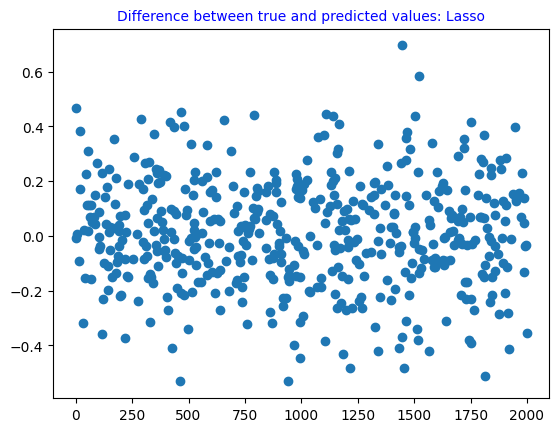

In [24]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: Lasso", c="blue", fontsize=10)
plt.show();

In [25]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.8662733951693228
Mean absolute error = 0.15438678364488181
Mean squared error = 0.03838166468978793
Root mean squared error = 0.19591239034269356
Maximum error = 0.6955311934824149


In [26]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.17938084657562126


In [27]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 0.9796601   0.99307938 -0.         -0.          0.97713106]


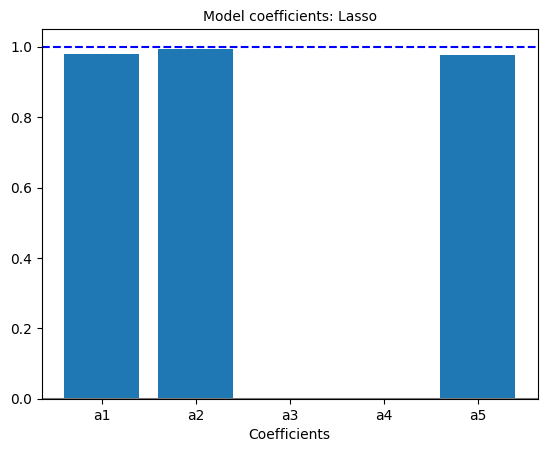

In [28]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: Lasso", fontsize=10)
plt.show();

#### ElasticNet

In [29]:
## Fit a model
model = ElasticNet(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [30]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

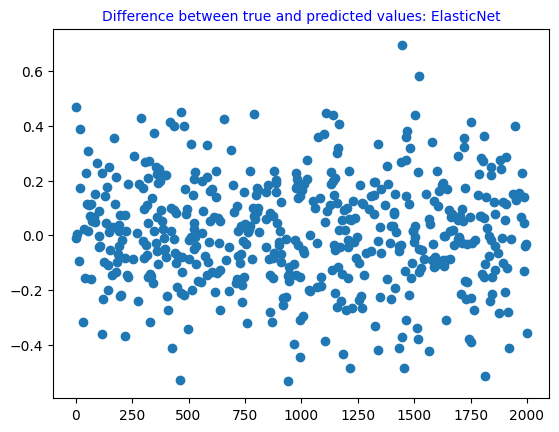

In [31]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: ElasticNet", c="blue", fontsize=10)
plt.show();

In [32]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.8661054284082162
Mean absolute error = 0.15448109787724645
Mean squared error = 0.0384298738244772
Root mean squared error = 0.19603538921449157
Maximum error = 0.6937449485622498


In [33]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1832718068286392


In [34]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 0.97974374  0.99319745 -0.00445953 -0.00350527  0.97719122]


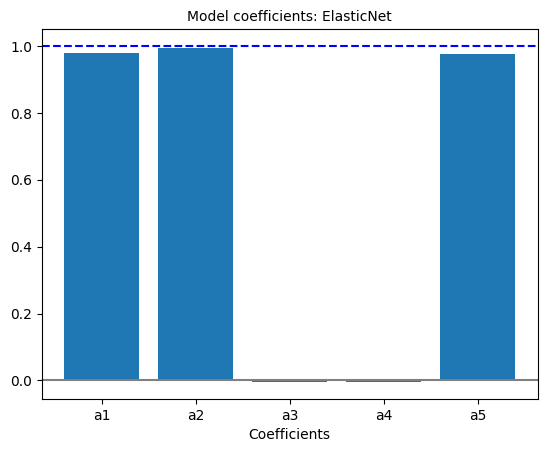

In [35]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: ElasticNet", fontsize=10)
plt.show();

#### Ridge

In [36]:
## Fit a model
model = Ridge(alpha=0.003).fit(X_train_with_noise, y_train_with_noise)

In [37]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

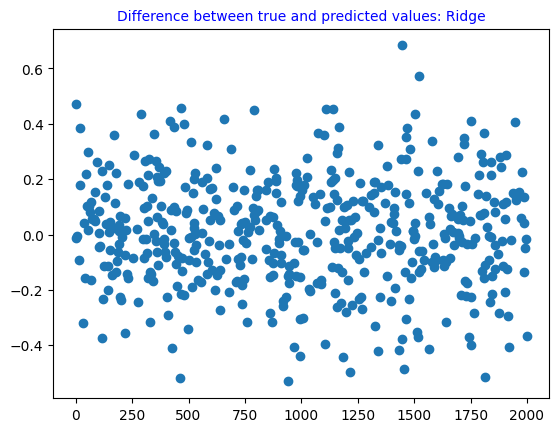

In [38]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: Ridge", c="blue", fontsize=10)
plt.show();

In [39]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.8662179149779441
Mean absolute error = 0.15448124215744918
Mean squared error = 0.038397588388031194
Root mean squared error = 0.19595302597314285
Maximum error = 0.6829165176151166


In [40]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1707663284974421


In [41]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 0.99160609  1.00592102 -0.01019363 -0.00991694  0.98971215]


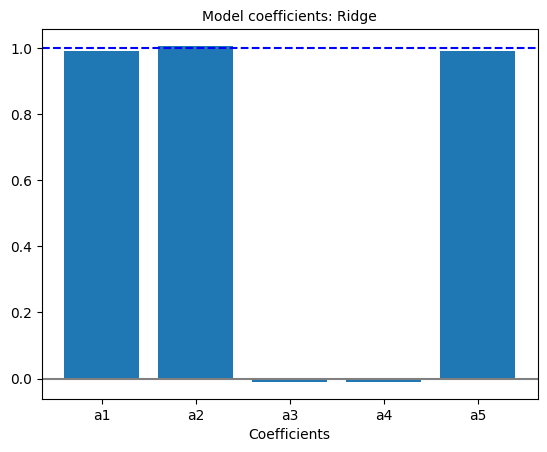

In [42]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: Ridge", fontsize=10)
plt.show();

#### BayesianRidge

In [43]:
## Fit a model
model = BayesianRidge(max_iter=1000).fit(X_train_with_noise, y_train_with_noise)

In [44]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

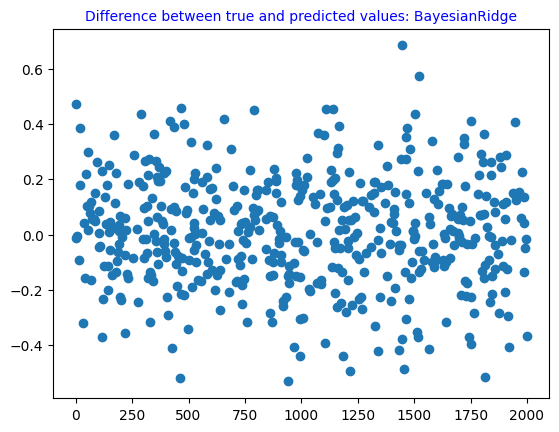

In [45]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: BayesianRidge", c="blue", fontsize=10)
plt.show();

In [46]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.8662048285692187
Mean absolute error = 0.1544841090563032
Mean squared error = 0.03840134439568824
Root mean squared error = 0.1959626096878898
Maximum error = 0.683259965690505


In [47]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.17156923658801548


In [48]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 0.99109067  1.00537534 -0.01020122 -0.009902    0.98916779]


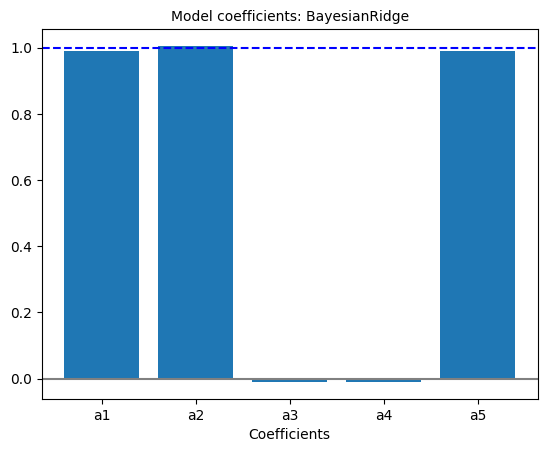

In [49]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: BayesianRidge", fontsize=10)
plt.show();

#### LassoCV

In [50]:
## Fit a model
model = LassoCV(cv=100, alphas=np.linspace(0.001,1,100)).fit(X_train_with_noise, y_train_with_noise)

In [51]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

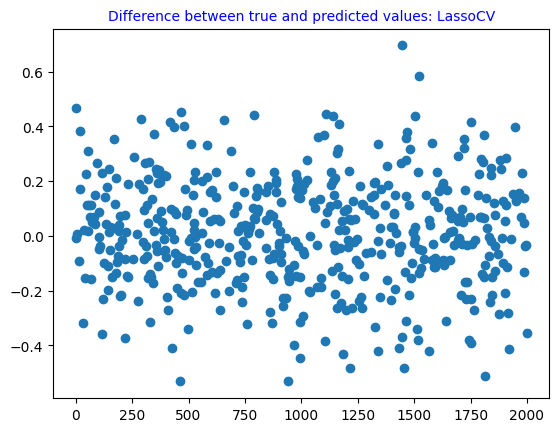

In [52]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: LassoCV", c="blue", fontsize=10)
plt.show();

In [53]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.8662733951693228
Mean absolute error = 0.15438678364488181
Mean squared error = 0.03838166468978793
Root mean squared error = 0.19591239034269356
Maximum error = 0.6955311934824149


In [54]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.17938084657562126


In [55]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 0.9796601   0.99307938 -0.         -0.          0.97713106]


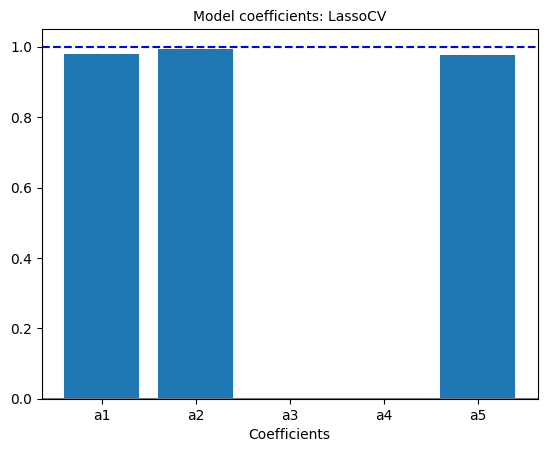

In [56]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LassoCV", fontsize=10)
plt.show();